**Question D**: For this task, sum up the daily stats (cases and deaths) from both states. Assume day 1 is June 1st 2020. Assume the combined daily deaths are Poisson distributed with parameter λ. Assume an Exponential prior (with mean β) on λ. Assume β = λMME where the MME is found using the first four weeks data (so the first 28 days of June 2020) as the sample data. Now, use the fifth week’s data (June 29 to July 5) to obtain the posterior for λ via Bayesian inference. Then, use sixth week’s data to obtain the new posterior, using prior as posterior after week 5. Repeat till the end of week 8 (that is, repeat till you have posterior after using 8th week’s data). Plot all posterior distributions on one graph. Report the MAP for all posteriors. 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as  plt

In [ ]:
#%cd D:\StonyBrook\Study\Prob&Stats CSE544\Project

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/Prob_stats_proj

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Prob_stats_proj


In [ ]:
data = pd.read_csv('7.csv')

In [ ]:
## converting date column to datetime data type ##
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data

,Date,IA confirmed cumulative,ID confirmed cumulative,IA deaths cumulative,ID deaths cumulative,IA confirmed,ID confirmed,IA deaths,ID deaths
0,2020-01-22,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
433,2021-03-30,349742,179429,5726,1956,141,0,7,0
434,2021-03-31,350840,180536,5744,1962,1098,1107,18,6
435,2021-04-01,351651,180897,5744,1963,811,361,0,1
436,2021-04-02,352262,181181,5752,1966,611,284,8,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     438 non-null    datetime64[ns]
 1   IA confirmed cumulative  438 non-null    int64         
 2   ID confirmed cumulative  438 non-null    int64         
 3   IA deaths cumulative     438 non-null    int64         
 4   ID deaths cumulative     438 non-null    int64         
 5   IA confirmed             438 non-null    int64         
 6   ID confirmed             438 non-null    int64         
 7   IA deaths                438 non-null    int64         
 8   ID deaths                438 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 30.9 KB


In [ ]:
#### June - July 2020 data ######

june_start_date, june_end_date = '2020-06-01' , '2020-06-28' # 28 days only
posterior_week_start_date, posterior_week_end_date = '2020-06-29' , '2020-07-05'

condition = (data['Date'] >= june_start_date) & (data['Date'] <= june_end_date)
june_28_data = data.loc[condition] 

condition = (data['Date'] >= posterior_week_start_date) & (data['Date'] <= posterior_week_end_date)
posterior_week_data = data.loc[condition] 

In [ ]:
##### summing up deaths data #####
handle_state_1 = 'IA deaths'
handle_state_2 = 'ID deaths'

june_28_data = june_28_data[handle_state_1] + june_28_data[handle_state_2]

posterior_week_data_ = posterior_week_data[handle_state_1] + posterior_week_data[handle_state_2]

#Bayesian Inference

Procedure: We calculated lambda value using MME for Poisson distribution for first 28 days of data. Using this lambda we calculated beta as 1/lambda and subsituted this in the prior. Next when finding the posterior, the distribution comes out as gamma where in every loop we ffind the powers of exponential and lambda and store it in table. Next we plotted the gamma distribution with MAP = alpha/beta

In [ ]:
def MME_Poisson(X):
    estimate = np.mean(X)
    return estimate
 
def get_estimates(exp_a, lambda_a, exp_b, lambda_b):
    return exp_a + exp_b, lambda_a + lambda_b

def plot_gamma(table):
    for estimate in table:
        alpha, beta = estimate[0], estimate[1]
        x = np.linspace(gamma.ppf(0.01, alpha, scale=1/beta),gamma.ppf(0.99, alpha,scale = 1/beta), 100)
        MAP = (alpha)/beta
        plt.plot(x, gamma.pdf(x, alpha,scale=1/beta), label = 'MAP: %.4f ' %(MAP))
        plt.xlabel('x')
        plt.ylabel('pdf')
    plt.legend(loc="upper right")
    plt.title('Gamma curves of estimates')
    plt.show()

In [ ]:
# Assuming it to be poisson distributed 

# Obtaining MME 

lambda_ = MME_Poisson(june_28_data)

print(' MME of poisson distributed data ', lambda_)

# prior beta 
exp_lambda = 1/lambda_ 

print(' Prior beta value ', exp_lambda)

## Since the prior is exponential and likelihood is poisson, the posterior is gamma distributed

likelihood_exp_power = len(posterior_week_data_)
likelihood_lambda_power = np.sum(posterior_week_data_)  
prior_exp_power = exp_lambda
prior_lambda_power = 0

table = []
for i in range(4): # till 8th week 
    prior_exp_power, prior_lambda_power = get_estimates(likelihood_exp_power, likelihood_lambda_power, prior_exp_power , prior_lambda_power)
    table.append([prior_lambda_power + 1,prior_exp_power])
    
    condition+=7
    posterior_week_data = data[166 + 7*i : 173 + 7*i]

    posterior_week_data_ = posterior_week_data[handle_state_1] + posterior_week_data[handle_state_2]

    likelihood_exp_power = len(posterior_week_data_)
    likelihood_lambda_power = np.sum(posterior_week_data_)
    

 MME of poisson distributed data  6.464285714285714
 Prior beta value  0.15469613259668508


In [ ]:
print(table)

[[19, 7.154696132596685], [57, 14.154696132596685], [117, 21.154696132596683], [178, 28.154696132596683]]


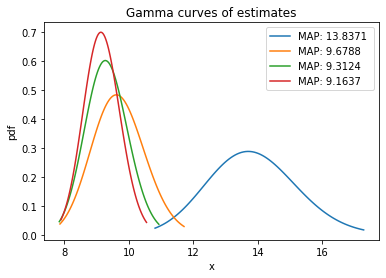

In [ ]:
plot_gamma(table)